# 1. Charger le dataset Boston de scikit-learn



In [30]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = raw_df.values[1::2, 2]
X, y = data, target

### Explorer les variables du dataset Boston

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

Exemple:

In [13]:
print(X[0])
print(y[0])

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
24.0


Séparer les données en train et test sets


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


# 2. Entraîner un arbre de régression pour prédire la valeur immobilière, tracer l'arbre, et l'importance de chacune des features de la base. Evaluer les performances en utilisant l'erreur quadratique moyenne (EQM).

In [21]:
#insérer le code ici
from sklearn import tree
from sklearn.metrics import mean_squared_error

regressor = tree.DecisionTreeRegressor()

#train
regressor = regressor.fit(X_train, y_train)

#test
predictions = regressor.predict(X_test)

#compute quadratic error
mse = mean_squared_error(y_test, predictions)
print(mse)


23.915433070866147


 ####  Essayons d'utiliser la fonction de scikit-learn qui permet de plotter les arbres : on se représentera mieux les règles de l'arbres de décision.

[]

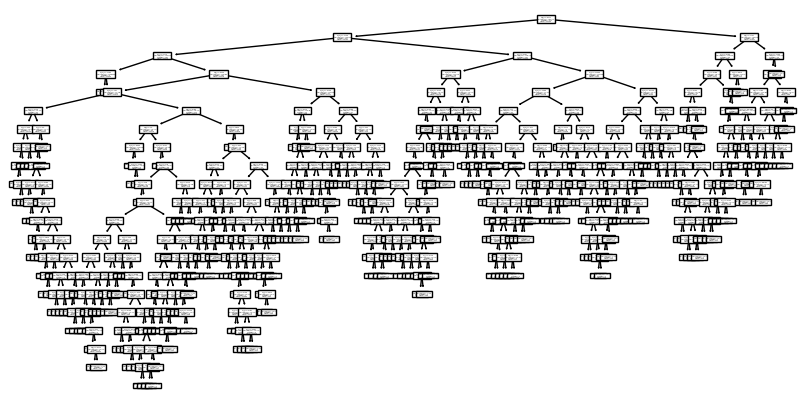

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(regressor)
plt.plot()

#### Regardons l'importance de chacune des features dans l'arbre de décision :

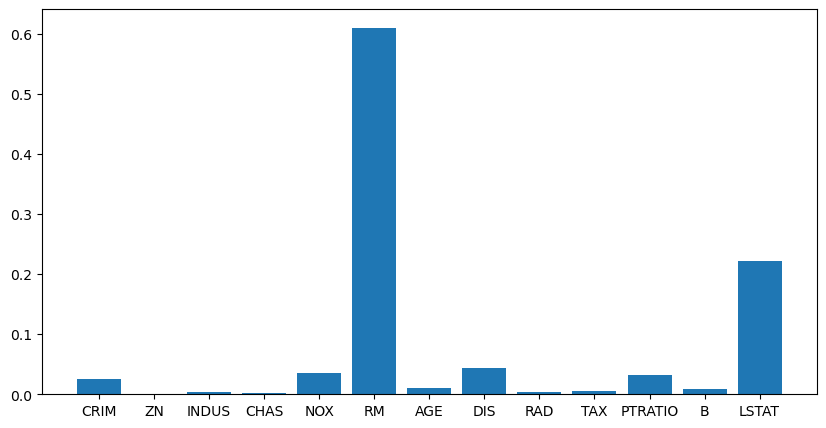

In [31]:
plt.figure(figsize=(10,5))
plt.bar([i for i in range(len(regressor.feature_importances_))], regressor.feature_importances_, tick_label=feature_names)
plt.show()

# 3. Entraîner plusieurs arbres de régression en faisant varier le paramètre max_depth. Evaluer les performances avec l'EQM, sur train et test, et tracer la courbe de cette métrique en fonction de max_depth. Que remarquez-vous?


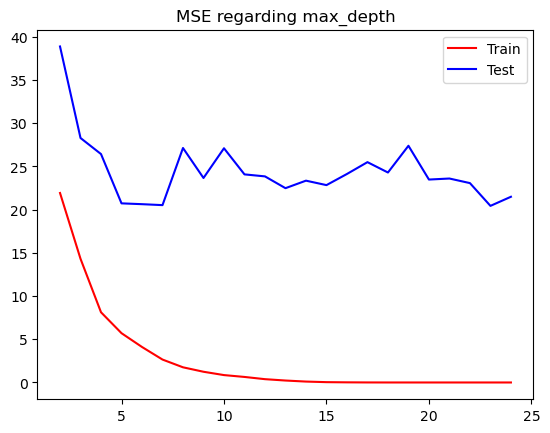

In [37]:
#insérer le code ici
from sklearn import tree
from sklearn.metrics import mean_squared_error

max_depth_ls = [] 
mse_train = []
mse_test = []


for i in range(2, 25):

    max_depth_ls.append(i)

    regressor = tree.DecisionTreeRegressor(max_depth=i)

    #train
    regressor = regressor.fit(X_train, y_train)

    #train test
    train_predictions = regressor.predict(X_train)

    #test
    test_predictions = regressor.predict(X_test)

    #compute quadratic error
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    mse_train.append(train_mse)
    mse_test.append(test_mse)

plt.figure()
plt.plot(max_depth_ls, mse_train, color='red', label='Train')
plt.plot(max_depth_ls, mse_test, color='blue', label='Test')
plt.title('MSE regarding max_depth')
plt.legend()
plt.show()

On remarque que si l'on augmente max_depth, les performances s'améliorent, mais stagnent vite.
On constate aussi la variabilité des prédictions sur les courbes tracées.


# 4. Entraîner plusieurs forêts aléatoires en faisant varier le paramètre max_depth. Evaluer les performances avec l'EQM sur train et test, et tracer la courbe de cette métrique en fonction de max_depth. Que remarquez-vous?

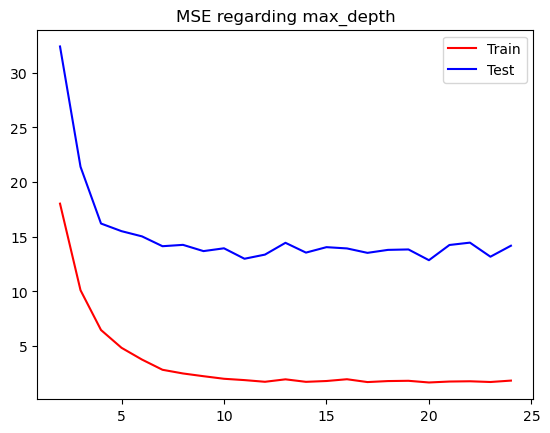

In [39]:
#insérer le code ici
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

max_depth_ls = [] 
mse_train = []
mse_test = []


for i in range(2, 25):

    max_depth_ls.append(i)

    rf = ensemble.RandomForestRegressor(max_depth=i)

    #train
    rf = rf.fit(X_train, y_train)

    #train test
    train_predictions = rf.predict(X_train)

    #test
    test_predictions = rf.predict(X_test)

    #compute quadratic error
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    mse_train.append(train_mse)
    mse_test.append(test_mse)

plt.figure()
plt.plot(max_depth_ls, mse_train, color='red', label='Train')
plt.plot(max_depth_ls, mse_test, color='blue', label='Test')
plt.title('MSE regarding max_depth')
plt.legend()
plt.show()

On observe une plus grande stabilité dans l'erreur de test qu'avec des arbres

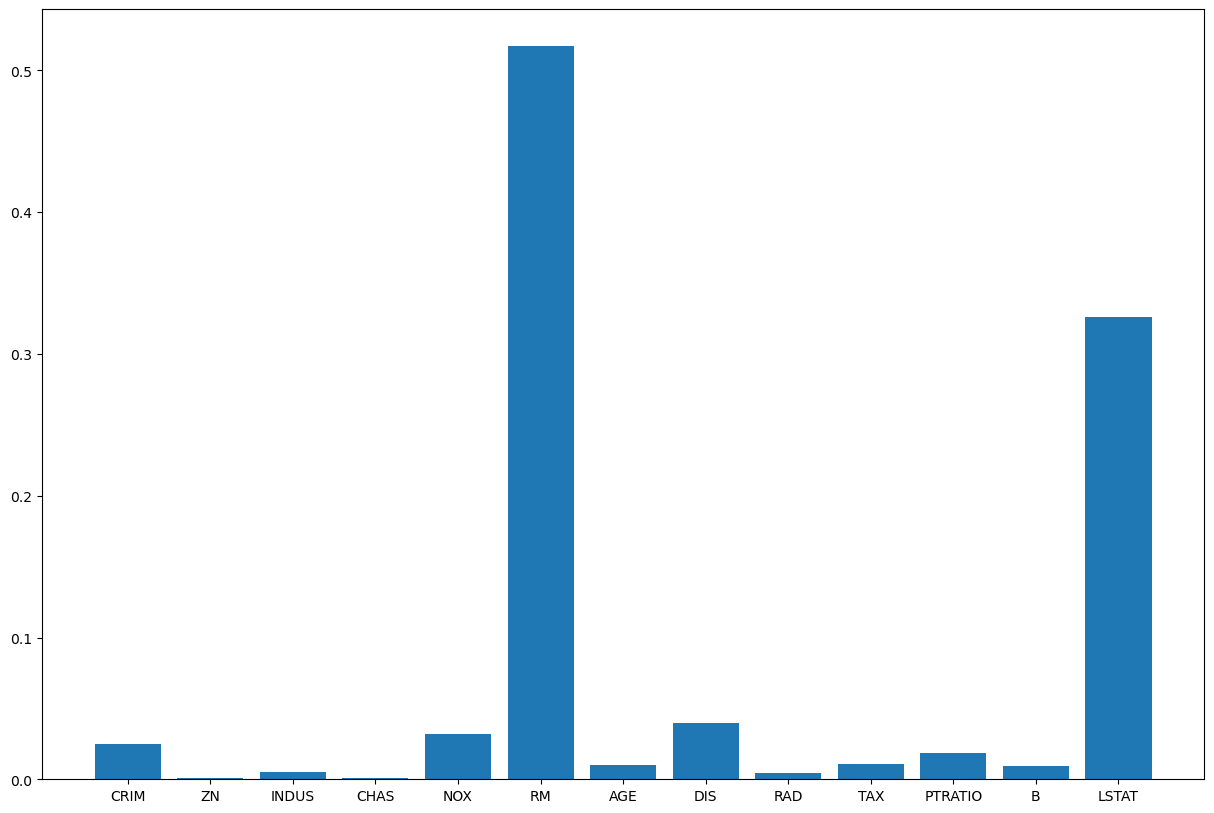

In [40]:


plt.figure(figsize=(15,10))
plt.bar([i for i in range(len(rf.feature_importances_))], rf.feature_importances_, tick_label=feature_names)
plt.show()



# 5. Montrer que scikit-learn aggrège les prédictions de chaque arbre de la forêt en faisait la moyenne de celles-ci

In [41]:
import numpy
from sklearn.metrics import r2_score

rf = ensemble.RandomForestRegressor(max_depth=20, random_state=0,
                             n_estimators=100)    
rf = rf.fit(X_train, y_train)


# Pour récupérer chacun des arbres (déjà entraîné) : rf. estimator

dest = numpy.zeros((X_test.shape[0], len(rf.estimators_)))
estimators = numpy.array(rf.estimators_).ravel()
for i, est in enumerate(estimators):
    pred = est.predict(X_test)
    dest[:, i] = pred

average = numpy.mean(dest, axis=1)
r2_score(y_test, average)


0.8471310195899839

In [42]:
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8471310195899839

In [ ]:
#compléter le code
from sklearn.linear_model import Lasso





# On printe les coeffs : 
plt.figure(figsize = (20,10))
plt.bar([i for i in range(len(rf.estimators_))], lr_pen.coef_)
plt.title('Coefficients pour chacun des arbres')
plt.show()


In [ ]:


y_pred = lr_pen.predict(X_test2)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))





C'est mieux, mais toujours moins bien que la moyenne.

--> choisir le paramètre $\alpha$
--> le faire varier et comparer les résultats

In [ ]:
alphas = [0.01 * i for i in range(100)] +[1 + 0.1 * i for i in range(100)]
mse_train = []
mse_test = []
r2_train = []
r2_test = []
for i in range(0, len(alphas)):
    alpha = alphas[i]
    lrs = Lasso(max_iter=20000, alpha=alpha)
    lrs.fit(X_train2, y_train)
    mse_train.append(mean_squared_error(y_train, lrs.predict(X_train2)))
    mse_test.append(mean_squared_error(y_test, lrs.predict(X_test2)))
    r2_train.append(r2_score(y_train, lrs.predict(X_train2)))
    r2_test.append(r2_score(y_test, lrs.predict(X_test2)))

In [ ]:
plt.figure()
plt.plot(alphas, mse_train, color='red', label='Train')
plt.plot(alphas, mse_test, color='blue', label='Test')
plt.title('EQM vs. max_depth')
plt.legend()
plt.show()
